In [4]:
import pandas as pd
import pandas_datareader.data as web
import json
import matplotlib.pyplot as plt
from datetime import datetime
# !pip install mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
plt.style.use('ggplot')

In [ ]:
# Moving average plot
start = '2010-01-01'
end = datetime.today()
legend = ['Adj Close', '15ma']
plt.figure(figsize=(22.5, 13.5))


df = web.DataReader('FB', data_source='yahoo', start=start, end=end)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df['15ma'] = df['Adj Close'].rolling(window=15, min_periods=0).mean()
plt.legend(legend, loc=0)

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['100ma'], color='green')
ax1.plot(df.index, df['Adj Close'], color='blue')
ax1.plot(df.index, df['15ma'], color='red')
ax2.bar(df.index, df['Volume'])


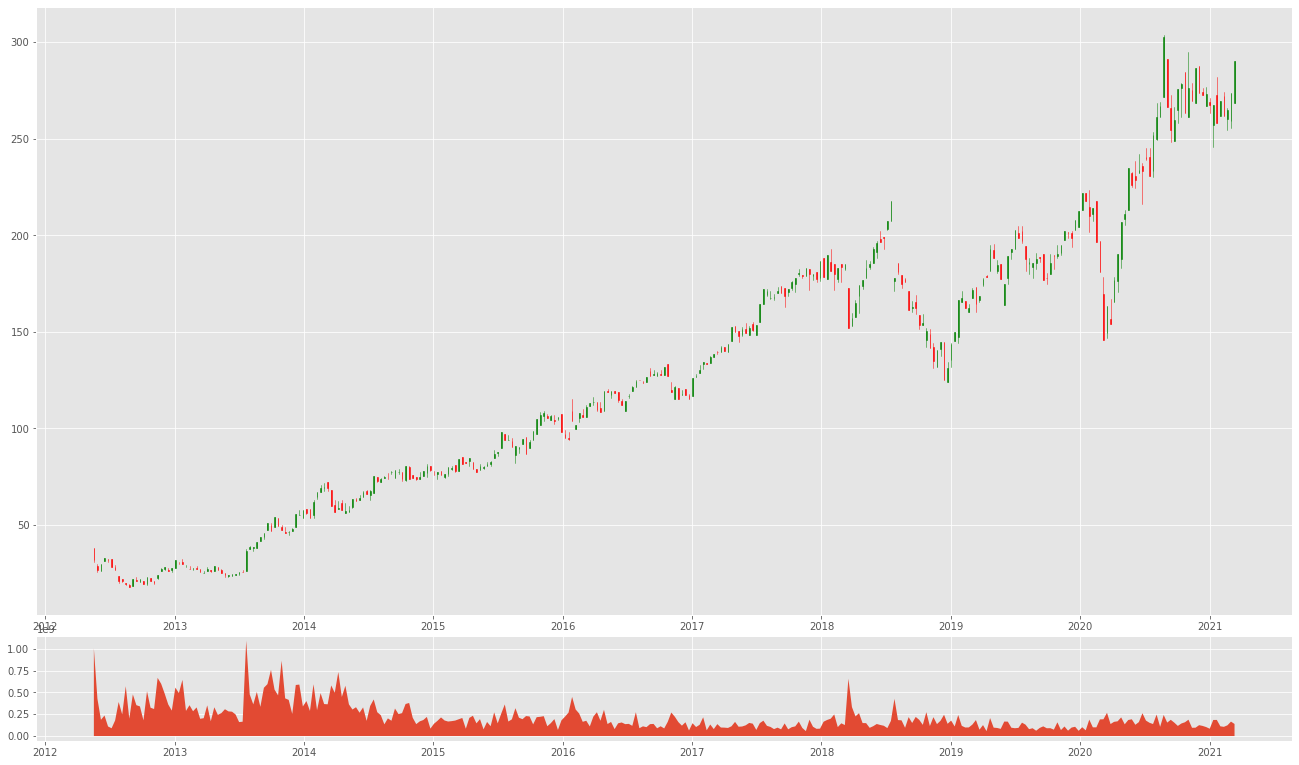

In [8]:
# Resample data, into a larger time frame, shrink

df = web.DataReader('FB', data_source='yahoo', start=start, end=end)
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

plt.figure(figsize=(22.5, 13.5))
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='green', colordown='red', alpha=2)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()